In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [3]:
df_train = pd.read_csv('dataset_complete_components_train.csv')
df_test = pd.read_csv('dataset_complete_components_test.csv')
df_val = pd.read_csv('dataset_complete_components_val.csv')

df = pd.concat([df_train, df_test, df_val])

In [4]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(123024, 31)
(8760, 32)
(2880, 32)


In [5]:
df = df.drop(['Unnamed: 0', 'Date_timed', 'PC1_Weather', 'PC2_Weather'], axis = 1).dropna()

In [8]:
columns = df.columns

In [9]:
df_nof = df[columns[:18]]

In [10]:
df_nof

,Energy_Demand,Day,Hour,Month,Tmax-Cab,Tmax-Hmo,Tmax-Obr,Tmax-Lmo,Tmax-Cul,Tmin-Cab,Tmin-Hmo,Tmin-Obr,Tmin-Lmo,Tmin-Cul,Prec_Hmo_Mm,Prec_Obr_Mm,Prec_Lmo_Mm,Prec_Cul_Mm
0,1394,0,0,1,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,0.0,0.0,0.0,0.0
1,1297,0,1,1,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,0.0,0.0,0.0,0.0
2,1255,0,2,1,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,0.0,0.0,0.0,0.0
3,1222,0,3,1,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,0.0,0.0,0.0,0.0
4,1168,0,4,1,21.0,22.0,25.0,30.0,29.0,2.0,9.0,8.0,10.0,9.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,3768,2,19,5,36.9,40.0,42.0,38.5,38.0,15.5,22.0,20.0,24.0,25.0,0.0,0.0,0.0,0.0
2876,3596,2,20,5,36.9,40.0,42.0,38.5,38.0,15.5,22.0,20.0,24.0,25.0,0.0,0.0,0.0,0.0
2877,3700,2,21,5,36.9,40.0,42.0,38.5,38.0,15.5,22.0,20.0,24.0,25.0,0.0,0.0,0.0,0.0
2878,3860,2,22,5,36.9,40.0,42.0,38.5,38.0,15.5,22.0,20.0,24.0,25.0,0.0,0.0,0.0,0.0


In [48]:
X = np.array(df_nof)
X_embedded = TSNE(n_components =2 , n_iter = 700, perplexity = 50).fit_transform(X)

In [52]:
df_2d = pd.DataFrame(X_embedded, columns = ['x', 'y'])

In [55]:
df_2d

,x,y
0,-70.713173,15.994143
1,-90.148781,14.704874
2,-90.382523,0.872462
3,-88.281151,-10.220834
4,-86.270515,-21.078392
...,...,...
134659,48.726505,23.184017
134660,74.255577,-16.967999
134661,55.195068,4.203814
134662,50.374939,44.526268


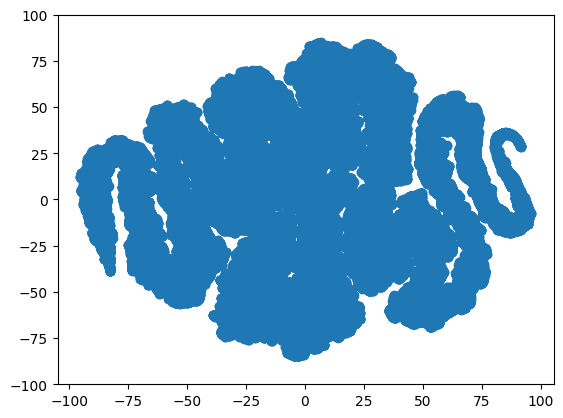

In [61]:
plt.scatter(df_2d['x'], df_2d['y'])
plt.ylim(-100,100)
plt.show()

In [62]:
X_f = np.array(df)
X_embedded_f = TSNE(n_components =2 , n_iter = 700, perplexity = 50).fit_transform(X_f)

In [12]:
perplexities = [40, 50, 60, 70, 80, 90]
early_exaggerations = [60, 70, 80, 90]

In [69]:
X_embedded_f

array([[-34.329655  ,  13.273637  ],
       [-38.198864  ,  -0.95586044],
       [-39.026867  ,  -8.522816  ],
       ...,
       [ 29.673576  ,   7.21849   ],
       [ 27.912945  ,  -8.286873  ],
       [ 30.045008  ,  -1.8017381 ]], dtype=float32)

In [13]:
X_f = np.array(df)
for perplexity in perplexities:
    for early_exaggeration in early_exaggerations:
        X_embedded_f = TSNE(n_components =2 , n_iter = 700, perplexity = 70, early_exaggeration=70).fit_transform(X_f)
        df_2d_f = pd.DataFrame(X_embedded_f, columns = ['x', 'y'])
        plt.scatter(X_embedded_f[:,0], X_embedded_f[:,1])
        plt.ylim(-100,100)
        plt.title(f'TSNE con perplejidad {perplexity} y early_exaggeration {early_exaggeration}')
        plt.show()

KeyboardInterrupt: 